## Instagram Data Analysis Project

In [40]:
# Importing necessarry libraries
import requests
import re
import pandas as pd
import bs4
from bs4 import BeautifulSoup
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import difflib
from collections import Counter

Webscraping the data donwloaded from instagram as html file.

In [41]:
file_path = '/Users/eslin/Desktop/insta proje/posts_1 copy.html'

# Open the local HTML file
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')


# Find all div elements with specific class
target_divs = soup.find_all('div', class_='pam _3-95 _2ph- _a6-g uiBoxWhite noborder')

nested_div_texts = []
# Iterate through the results and do something with each div
for div in target_divs:
    nested_div = div.find('div', class_='_3-95 _2pim _a6-h _a6-i')

    if nested_div:
        nested_div_texts.append(nested_div.text)

    df_text = pd.DataFrame({'Texts': nested_div_texts})

# Print the DataFrame
print(df_text)

# Extract text after the first "#" character
df_hashtags = df_text['Texts'].str.extractall(r'#(\S+)').unstack().apply(lambda x: ', '.join(x.dropna()), axis=1)

# Rename the column to hashtags
df_hashtags.columns = ['Hashtags']

# Display the new DataFrame
print(df_hashtags)

                                                 Texts
0    Just a lil practice\n---\n#diamond #whitediamo...
1    Phos moon form\n---\n#宝石の国 #phos #phosphophyll...
2    Half-oc-tober art dump part 2\n☆ Worst memory ...
3    Half-oc-tober art dump part 1\n☆ Jojo pose - O...
4    Half-oc-tober Day 19: Oc in casual\nclothes\nT...
..                                                 ...
104  ⚫⚪\n-\n#persona #persona5 #persona5royal #akec...
105  Pirate au\n---\n#persona #persona5 #persona5ro...
106  Sketch\n---\n#persona #persona5 #persona5royal...
107  Akechi goro\n---\n#akechigoro #goroakechi #per...
108  Earthy toned ren\n---\n#persona #persona5 #per...

[109 rows x 1 columns]
0      diamond, whitediamond, diamondhnk, whitediamon...
1      宝石の国, phos, phosphophyllite, laphos, hnkphos, ...
2      oc, originalcharacter, oc, ocart, originalchar...
3      housekinokunioc, hnkoc, ochnk, ocreference, lo...
4      ocdrawing, oc, ocs, ocart, originalcharacter, ...
                             ..

In [42]:
file_path = '/Users/eslin/Desktop/insta proje/posts_1 copy.html'

# Open the local HTML file
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content
soup = BeautifulSoup(html_content, 'html.parser')

# Find all div elements with a specific class
target_divs = soup.find_all('div', class_='pam _3-95 _2ph- _a6-g uiBoxWhite noborder')

nested_div_texts = []
# Iterate through the results and change to correct timezone
for div in target_divs:
    nested_div = div.find('div', class_='_3-94 _a6-o')

    if nested_div: 
        index_of_colon = nested_div.text.find(":")
        if index_of_colon != -1 and index_of_colon >= 2:
            # Extract two characters before ":"
            newtime = nested_div.text[index_of_colon - 2 : index_of_colon]
    
            # Increment the second character by 11 to convert the time zone from Pacific to the Turkish Time zone of UTC+3
            intval = (int(newtime[0]) * 10 + int(newtime[1]) + 11) % 24
            nested_div_texts.append(nested_div.text[:index_of_colon - 2] + str(intval) + nested_div.text[index_of_colon:])


    df_date = pd.DataFrame({'Date': nested_div_texts})

# Print the entire DataFrame
print(df_date)

df_date_split = df_date['Date'].str.split(expand=True)

# Extract day, month, year, and time using regular expressions
df_date_split.columns = ['Day', 'Month', 'Year', 'Time']
df_date_split[['Day', 'Month', 'Year']] = df_date_split[['Day', 'Month', 'Year']].apply(lambda x: x.str.strip())

month_mapping = {'Oca': 'Jan', 'Şub': 'Feb', 'Mar': 'Mar', 'Nis': 'Apr', 'May': 'May', 'Haz': 'Jun',
                 'Tem': 'Jul', 'Ağu': 'Aug', 'Eyl': 'Sep', 'Eki': 'Oct', 'Kas': 'Nov', 'Ara': 'Dec'}

# Replace the 'Month' values in the DataFrame
df_date_split['Month'] = df_date_split['Month'].map(month_mapping)

# Display the new DataFrame
print(df_date_split)

                  Date
0    29 Kas 2023 17:15
1    27 Kas 2023 15:24
2     7 Kas 2023 11:59
3     6 Kas 2023 12:40
4    19 Eki 2023 23:20
..                 ...
104  27 Mar 2022 23:26
105  12 Şub 2022 21:13
106   9 Şub 2022 17:10
107  29 Oca 2022 20:58
108  28 Oca 2022 21:11

[109 rows x 1 columns]
    Day Month  Year   Time
0    29   Nov  2023  17:15
1    27   Nov  2023  15:24
2     7   Nov  2023  11:59
3     6   Nov  2023  12:40
4    19   Oct  2023  23:20
..   ..   ...   ...    ...
104  27   Mar  2022  23:26
105  12   Feb  2022  21:13
106   9   Feb  2022  17:10
107  29   Jan  2022  20:58
108  28   Jan  2022  21:11

[109 rows x 4 columns]


In [44]:
# Function to find the day of the week
def find_day(row):
    date_str = f"{row['Day'].strip()} {row['Month']} {row['Year'].strip()}"
    try:
        date_object = datetime.strptime(date_str, "%d %b %Y")
        day_of_week = date_object.strftime("%A")
        return day_of_week
    except ValueError:
        return "Invalid date format"

# Apply the function to create a new 'WeekDay' column
df_date_split['WeekDay'] = df_date_split.apply(find_day, axis=1)

# Display the updated DataFrame
print(df_date_split)

    Day Month  Year   Time    WeekDay
0    29   Nov  2023  17:15  Wednesday
1    27   Nov  2023  15:24     Monday
2     7   Nov  2023  11:59    Tuesday
3     6   Nov  2023  12:40     Monday
4    19   Oct  2023  23:20   Thursday
..   ..   ...   ...    ...        ...
104  27   Mar  2022  23:26     Sunday
105  12   Feb  2022  21:13   Saturday
106   9   Feb  2022  17:10  Wednesday
107  29   Jan  2022  20:58   Saturday
108  28   Jan  2022  21:11     Friday

[109 rows x 5 columns]


In [45]:
likes = [ 110, 146, 69, 56, 40, 38, 52, 37, 124, 156,
         60, 69, 62, 71, 36, 61, 22, 58, 33, 36, 52,
         30, 36, 26, 43, 49, 40, 31, 37, 34, 35,
         34, 38, 42, 20, 20, 45, 30, 19, 21, 22,
         31, 48, 38, 31, 33, 39, 108, 18, 28, 40,
         46, 43, 37, 52, 98, 287, 230, 223, 62, 103,
         271, 196, 226, 100, 26, 22, 98, 64, 76, 33,
         22, 19, 61, 67, 70, 78, 68, 94, 88, 91,
         79, 49, 194, 26, 47, 20, 14, 46, 14, 43,
         39, 53, 49, 26, 53, 12, 36, 34, 21, 54,
         22, 40, 231, 152, 43, 32, 100, 37]

reel_likes = [11, 2, 19, 18, 4, 22, 3, 11, 0, 2, 13, 18, 0, 0, 0, 2, 11]

print(len(likes))
print(len(reel_likes))

109
17


In [46]:
# Concatenate the two DataFrames along columns
df_combined = pd.concat([df_hashtags, df_date_split], axis=1)
df_combined['likes'] = likes

print(df_combined)

                                                     0 Day Month  Year   Time  \
0    diamond, whitediamond, diamondhnk, whitediamon...  29   Nov  2023  17:15   
1    宝石の国, phos, phosphophyllite, laphos, hnkphos, ...  27   Nov  2023  15:24   
2    oc, originalcharacter, oc, ocart, originalchar...   7   Nov  2023  11:59   
3    housekinokunioc, hnkoc, ochnk, ocreference, lo...   6   Nov  2023  12:40   
4    ocdrawing, oc, ocs, ocart, originalcharacter, ...  19   Oct  2023  23:20   
..                                                 ...  ..   ...   ...    ...   
104  persona, persona5, persona5royal, akechigoro, ...  27   Mar  2022  23:26   
105  persona, persona5, persona5royal, renamamiya, ...  12   Feb  2022  21:13   
106  persona, persona5, persona5royal, renamamiya, ...   9   Feb  2022  17:10   
107  akechigoro, goroakechi, persona, persona5, per...  29   Jan  2022  20:58   
108  persona, persona5, persona5royal, renamamiya, ...  28   Jan  2022  21:11   

       WeekDay  likes  
0  

# Months

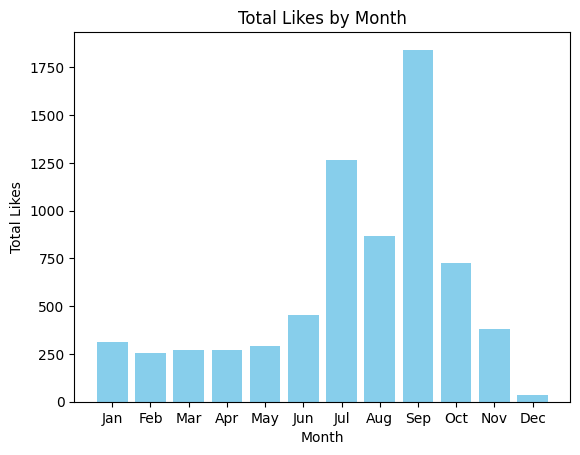

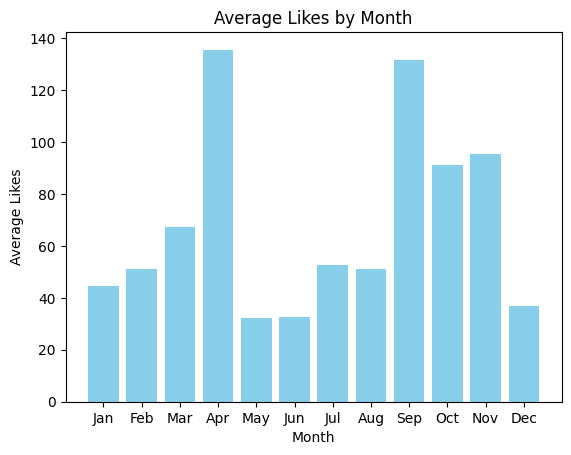

In [48]:
month_order = month_mapping = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_combined['Month'] = pd.Categorical(df_combined['Month'], categories=month_order, ordered=True)

# Group by month and calculate the total likes for each month
monthly_likes = df_combined.groupby('Month', observed=False)['likes'].sum()

# Create a bar plot
plt.bar(monthly_likes.index, monthly_likes.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Likes')
plt.title('Total Likes by Month')
plt.show()

average_likes = df_combined.groupby('Month', observed=False)['likes'].mean()

# Create a bar plot
plt.bar(average_likes.index, average_likes.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.title('Average Likes by Month')
plt.show()

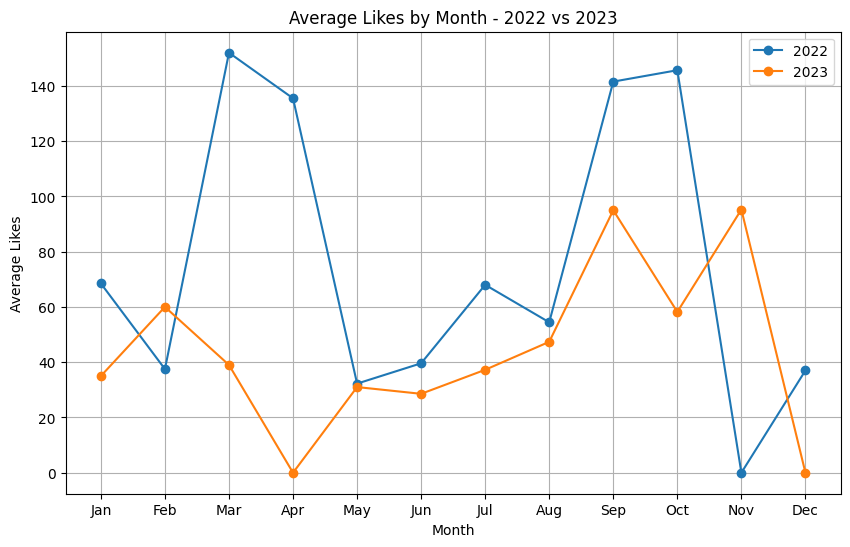

In [49]:
# Group by month and year and calculate the average likes for each group
average_likes_by_month_year = df_combined.groupby(['Month','Year'], observed=False)['likes'].mean().reset_index()

# Replace NaN values
average_likes_by_month_year['likes'].fillna(0, inplace=True)

# Separate the data for 2022 and 2023
df_2022 = average_likes_by_month_year[average_likes_by_month_year['Year'] == "2022"]
df_2023 = average_likes_by_month_year[average_likes_by_month_year['Year'] == "2023"]

plt.figure(figsize=(10, 6))

plt.plot(df_2022['Month'], df_2022['likes'], label='2022', marker='o', linestyle='-')
plt.plot(df_2023['Month'], df_2023['likes'], label='2023', marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.title('Average Likes by Month - 2022 vs 2023')
plt.legend()
plt.grid(True)
plt.show()

# Day of Weeks

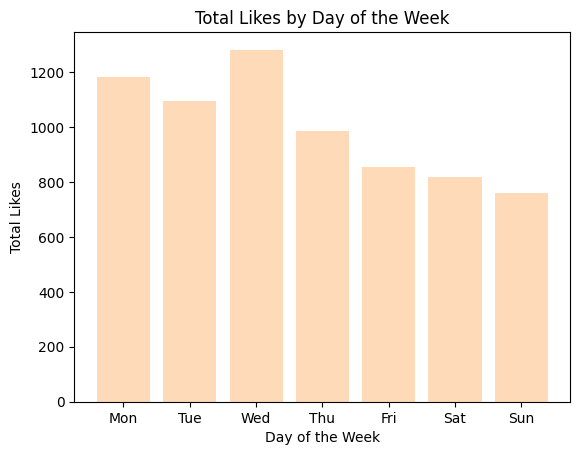

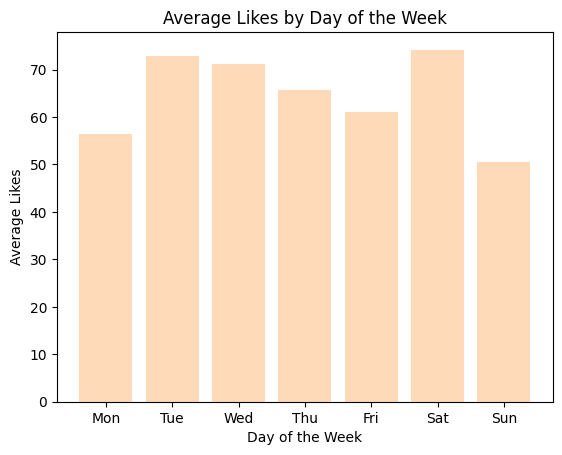

In [50]:
weekday_order = weekday_mapping = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_combined['WeekDay'] = pd.Categorical(df_combined['WeekDay'], categories=weekday_order, ordered=True)

# Group by month and calculate the total likes for each week day
weekday_likes = df_combined.groupby('WeekDay', observed=False)['likes'].sum()

# Create a bar plot
plt.bar(weekday_likes.index, weekday_likes.values, color='#FFDAB9')
plt.xlabel('Day of the Week')
plt.xticks(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Total Likes')
plt.title('Total Likes by Day of the Week')
plt.show()

average_likes = df_combined.groupby('WeekDay', observed=False)['likes'].mean()

# Create a bar plot
plt.bar(average_likes.index, average_likes.values, color='#FFDAB9')
plt.xlabel('Day of the Week')
plt.xticks(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.ylabel('Average Likes')
plt.title('Average Likes by Day of the Week')
plt.show()

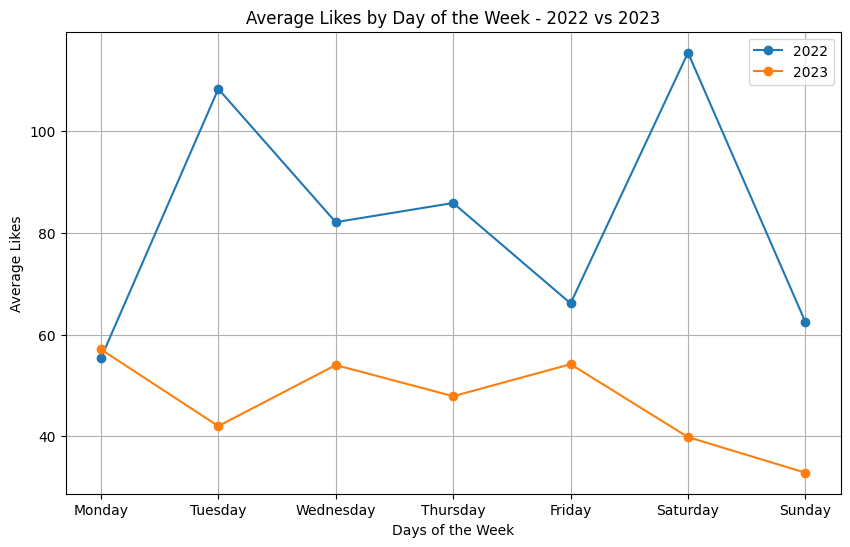

In [14]:
# Group by day and year and calculate the average likes for each group
average_likes_by_weekday_year = df_combined.groupby(['WeekDay','Year'], observed=False)['likes'].mean().reset_index()

# Replace NaN values with 0
average_likes_by_month_year['likes'].fillna(0, inplace=True)

# Separate the data for 2022 and 2023
df_2022 = average_likes_by_weekday_year[average_likes_by_weekday_year['Year'] == "2022"]
df_2023 = average_likes_by_weekday_year[average_likes_by_weekday_year['Year'] == "2023"]

# Plot two line plots on the same graph
plt.figure(figsize=(10, 6))

plt.plot(df_2022['WeekDay'], df_2022['likes'], label='2022', marker='o', linestyle='-')
plt.plot(df_2023['WeekDay'], df_2023['likes'], label='2023', marker='o', linestyle='-')

plt.xlabel('Days of the Week')
plt.ylabel('Average Likes')
plt.title('Average Likes by Day of the Week - 2022 vs 2023')
plt.legend()
plt.grid(True)
plt.show()

# Hour

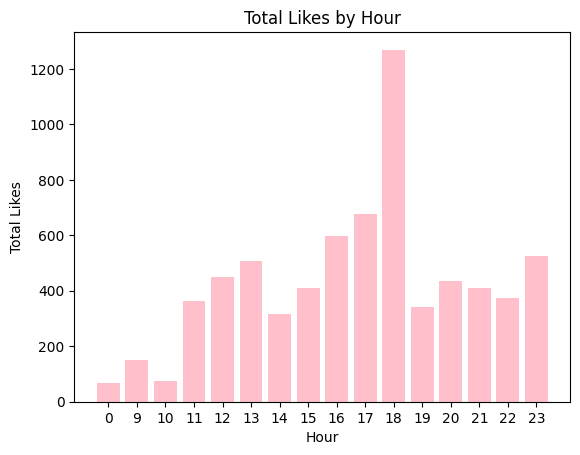

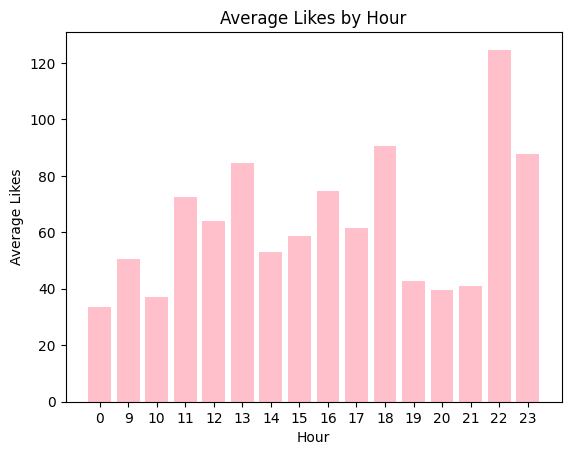

In [51]:
# Extract the hour from the 'Time' column
df_combined['Hour'] = df_combined['Time'].str.split(':').str[0]

# Convert the 'Hour' column to a format suitable for plotting
hour_order = hour_mapping = ['0', '9', '10', '11', '12', '13' ,'14' ,'15' ,'16' ,'17' ,'18', '19' , '20' , '21' , '22' , '23']
df_combined['Hour'] = pd.Categorical(df_combined['Hour'], categories=hour_order, ordered=True)

# Group by hour and calculate the average likes for each group
total_likes_by_hour = df_combined.groupby('Hour', observed=False)['likes'].sum().reset_index()

# Replace NaN values with 0
total_likes_by_hour['likes'].fillna(0, inplace=True)

# Plot a bar graph for average likes by hour
plt.bar(total_likes_by_hour['Hour'], total_likes_by_hour['likes'], color='pink')
plt.xlabel('Hour')
plt.ylabel('Total Likes')
plt.title('Total Likes by Hour')
plt.show()

# Group by hour and calculate the average likes for each group
average_likes_by_hour = df_combined.groupby('Hour', observed=False)['likes'].mean().reset_index()

# Replace NaN values with 0
average_likes_by_hour['likes'].fillna(0, inplace=True)

# Plot a bar graph for average likes by hour
plt.bar(average_likes_by_hour['Hour'], average_likes_by_hour['likes'], color='pink')
plt.xlabel('Hour')
plt.ylabel('Average Likes')
plt.title('Average Likes by Hour')
plt.show()

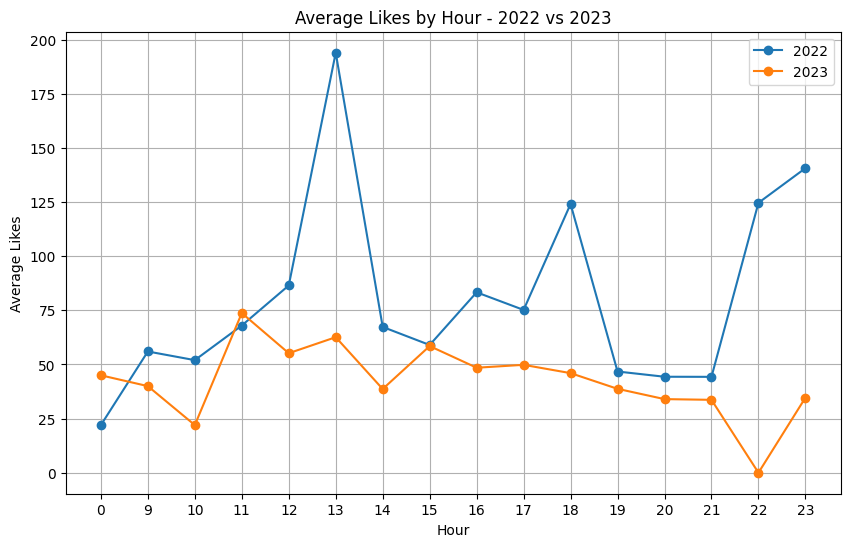

In [52]:
# Group by hour and year and calculate the average likes for each group
average_likes_by_hour_year = df_combined.groupby(['Hour','Year'], observed=False)['likes'].mean().reset_index()

# Replace NaN values with 0
average_likes_by_hour_year['likes'].fillna(0, inplace=True)

# Separate the data for 2022 and 2023
df_2022 = average_likes_by_hour_year[average_likes_by_hour_year['Year'] == "2022"]
df_2023 = average_likes_by_hour_year[average_likes_by_hour_year['Year'] == "2023"]

# Plot two line plots on the same graph
plt.figure(figsize=(10, 6))

plt.plot(df_2022['Hour'], df_2022['likes'], label='2022', marker='o', linestyle='-')
plt.plot(df_2023['Hour'], df_2023['likes'], label='2023', marker='o', linestyle='-')

plt.xlabel('Hour')
plt.ylabel('Average Likes')
plt.title('Average Likes by Hour - 2022 vs 2023')
plt.legend()
plt.grid(True)
plt.show()

df_combined = df_combined.drop(columns=['Hour'])

# Like Change relative to Day Change 

In [54]:
month_mapping = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4,
    'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8,
    'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}

df_combined['Month'] = df_combined['Month'].map(month_mapping)

# Convert 'Day', 'Month', 'Year' columns to a datetime object
df_combined['Date'] = pd.to_datetime(df_combined[['Year', 'Month', 'Day']])

# Sort DataFrame by 'Date' column
df_combined = df_combined.sort_values('Date')

# Add new column 'DaysSinceLastPost'
df_combined['DaysSinceLastPost'] = (df_combined['Date'] - df_combined['Date'].shift()).dt.days

month_mapping = {
    1 : 'Jan', 2 :'Feb', 3 : 'Mar', 4: 'Apr',
    5: 'May', 6:'Jun', 7: 'Jul', 8: 'Aug',
    9: 'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}
df_combined['Month'] = df_combined['Month'].map(month_mapping)

# Make days integers and fill missing values 0
df_combined['DaysSinceLastPost'] = df_combined['DaysSinceLastPost'].fillna(0).astype(int)


df_combined = df_combined.sort_values('Date', ascending=True)

# Add new column 'LikeChange'
df_combined['LikeChange'] = df_combined['likes'] - df_combined['likes'].shift()

# Make like change integers and fill missing values 0
df_combined['LikeChange'] = df_combined['LikeChange'].fillna(0).astype(int)

# Sort according to first
df_combined = df_combined.sort_values('Date', ascending=False)

# Drop the 'Date' column
df_combined = df_combined.drop(columns=['Date'])

print(df_combined)

                                                     0 Day Month  Year   Time  \
0    diamond, whitediamond, diamondhnk, whitediamon...  29   Nov  2023  17:15   
1    宝石の国, phos, phosphophyllite, laphos, hnkphos, ...  27   Nov  2023  15:24   
2    oc, originalcharacter, oc, ocart, originalchar...   7   Nov  2023  11:59   
3    housekinokunioc, hnkoc, ochnk, ocreference, lo...   6   Nov  2023  12:40   
4    ocdrawing, oc, ocs, ocart, originalcharacter, ...  19   Oct  2023  23:20   
..                                                 ...  ..   ...   ...    ...   
104  persona, persona5, persona5royal, akechigoro, ...  27   Mar  2022  23:26   
105  persona, persona5, persona5royal, renamamiya, ...  12   Feb  2022  21:13   
106  persona, persona5, persona5royal, renamamiya, ...   9   Feb  2022  17:10   
107  akechigoro, goroakechi, persona, persona5, per...  29   Jan  2022  20:58   
108  persona, persona5, persona5royal, renamamiya, ...  28   Jan  2022  21:11   

       WeekDay  likes  Days

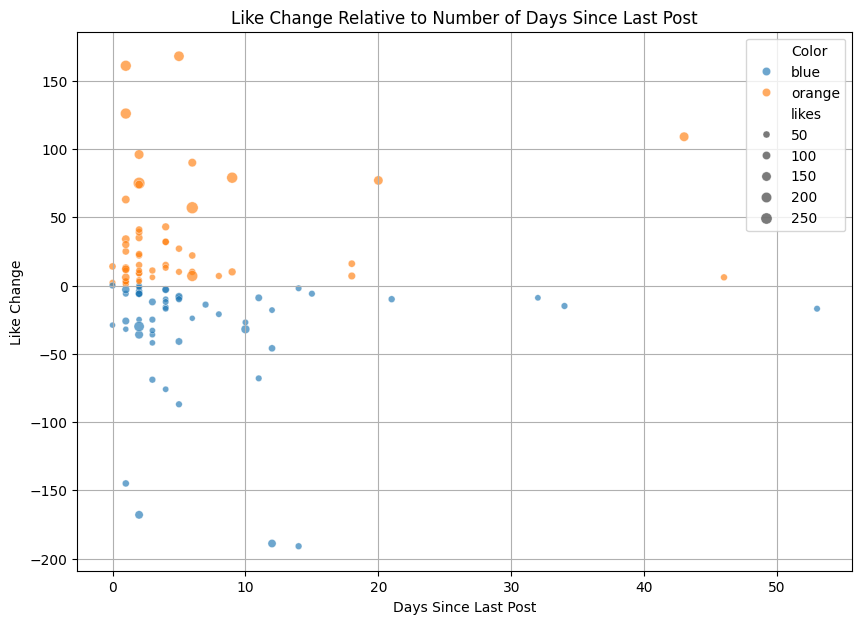

In [55]:
# Assuming your DataFrame is named df_combined
plt.figure(figsize=(10, 7))

# Create a new column 'Color' based on the condition
df_combined['Color'] = df_combined['LikeChange'].apply(lambda x: 'blue' if x <= 0 else 'orange')

# Plot the bubble chart with different colors
sns.scatterplot(x='DaysSinceLastPost', y='LikeChange', size='likes', hue='Color', data=df_combined, alpha=0.65)

plt.title('Like Change Relative to Number of Days Since Last Post')
plt.xlabel('Days Since Last Post')
plt.ylabel('Like Change')
plt.grid(True)
plt.show()

df_combined = df_combined.drop(columns=['Color'])

# Tag filteration

There are many tags in the posts. Many of them are similar to eachother. because of this, Machine learning method (NLP) is used to group the tags.
Then some graphs sabout tag and likes will be shown

In [56]:
df_combined = df_combined.rename(columns={0: 'Tags'})

print(df_combined)

                                                  Tags Day Month  Year   Time  \
0    diamond, whitediamond, diamondhnk, whitediamon...  29   Nov  2023  17:15   
1    宝石の国, phos, phosphophyllite, laphos, hnkphos, ...  27   Nov  2023  15:24   
2    oc, originalcharacter, oc, ocart, originalchar...   7   Nov  2023  11:59   
3    housekinokunioc, hnkoc, ochnk, ocreference, lo...   6   Nov  2023  12:40   
4    ocdrawing, oc, ocs, ocart, originalcharacter, ...  19   Oct  2023  23:20   
..                                                 ...  ..   ...   ...    ...   
104  persona, persona5, persona5royal, akechigoro, ...  27   Mar  2022  23:26   
105  persona, persona5, persona5royal, renamamiya, ...  12   Feb  2022  21:13   
106  persona, persona5, persona5royal, renamamiya, ...   9   Feb  2022  17:10   
107  akechigoro, goroakechi, persona, persona5, per...  29   Jan  2022  20:58   
108  persona, persona5, persona5royal, renamamiya, ...  28   Jan  2022  21:11   

       WeekDay  likes  Days

In [57]:
# Split the tags and count occurrences
all_tags = [tag for tags in df_combined['Tags'].str.split(', ') for tag in tags]
tag_counts = Counter(all_tags)

# Create a new DataFrame with tag counts
df_tag_counts = pd.DataFrame(list(tag_counts.items()), columns=['Tag', 'Count'])

# Order the DataFrame by count in descending order
df_tag_counts = df_tag_counts.sort_values(by='Count', ascending=False)

# Display the resulting DataFrame
print(df_tag_counts)

                        Tag  Count
17               digitalart    101
16                   fanart     99
18                      art     91
110          persona5fanart     40
111           personafanart     40
..                      ...    ...
137  cairngormhousekinokuni      1
136            cairngormhnk      1
135               cairngorm      1
134               rutilehnk      1
258            futabasakura      1

[259 rows x 2 columns]


## *Art*, *fanart* and *digital art* tags (all are tagged over ~90% of the posts) are excludeed since I try to tag them in every post. Therefore they do not have much effect on likes

In [58]:
df_tag_counts.drop(df_tag_counts[df_tag_counts['Count'] > 90].index, inplace=True)

print(df_tag_counts)

                        Tag  Count
110          persona5fanart     40
111           personafanart     40
98            persona5royal     38
97                 persona5     38
96                  persona     38
..                      ...    ...
137  cairngormhousekinokuni      1
136            cairngormhnk      1
135               cairngorm      1
134               rutilehnk      1
258            futabasakura      1

[256 rows x 2 columns]


## NLP technique. Text similarity measure. With difflib

In [59]:
# Function to find similarity using difflib
def get_similarity(tag1, tag2):
    return difflib.SequenceMatcher(None, tag1, tag2).ratio()


# Dictionary to store groups
tag_groups = {}

for i, tag in enumerate(df_tag_counts['Tag']):
     # Remove 'fanart' from the tag
    tag_without_fanart = tag.replace('fanart', '').strip()
    grouped = False
    
    # If tag contains specific words
    if 'oc' in tag_without_fanart or 'originalcharacter' in tag_without_fanart:
        tag_groups['originalcharacter'] = tag_groups.get('originalcharacter', []) + [tag]
        grouped = True
    if 'hnk' in tag_without_fanart or 'housekinokuni' in tag_without_fanart or 'landoflustrous' in tag_without_fanart:
        tag_groups['housekinokuni'] = tag_groups.get('housekinokuni', []) + [tag]
        grouped = True
    elif 'tloz' in tag_without_fanart or 'botw' in  tag_without_fanart or 'totk' in  tag_without_fanart:
        tag_groups['tloz'] = tag_groups.get('tloz', []) + [tag]
        grouped = True
    elif 'persona5' in tag_without_fanart or 'p5' in tag_without_fanart:
        tag_groups['persona5'] = tag_groups.get('persona5', []) + [tag]
        grouped = True
    else:
        highest_similarity = 0.0  # Initialize highest_similarity to 0
        best_group = None  # Initialize best_group to None

        for group in tag_groups.keys():
            for member in tag_groups[group]:
                similarity = get_similarity(tag_without_fanart, member)
                if similarity > highest_similarity:
                    highest_similarity = similarity
                    best_group = group

        if highest_similarity > 0.57:
            tag_groups[best_group].append(tag)
            grouped = True
        else:
            # No suitable group is found, create a new group
            tag_groups[tag_without_fanart] = [tag]

# Create mapping dictionary for group names
group_mapping = {tag: group for group, tags in tag_groups.items() for tag in tags}

df_tag_counts['Group'] = df_tag_counts['Tag'].map(group_mapping)

# Set display options to show more rows and columns
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.reset_option('display.max_rows')
#pd.reset_option('display.max_columns')

print(df_tag_counts)

                        Tag  Count          Group
110          persona5fanart     40       persona5
111           personafanart     40       persona5
98            persona5royal     38       persona5
97                 persona5     38       persona5
96                  persona     38       persona5
..                      ...    ...            ...
137  cairngormhousekinokuni      1  housekinokuni
136            cairngormhnk      1  housekinokuni
135               cairngorm      1  housekinokuni
134               rutilehnk      1  housekinokuni
258            futabasakura      1         futaba

[256 rows x 3 columns]


In [60]:
unique_groups = df_tag_counts['Group'].unique()
print("Length of the groups: ", len(unique_groups))
print(unique_groups)

Length of the groups:  69
['persona5' 'housekinokuni' 'renamamiya' 'akirakurusu' 'akechigoro'
 'anime' 'ren' 'lotl' '宝石の国' 'shuake' 'akeshu' 'originalcharacter'
 'GemJune' 'phosphophyllite' 'phos' 'illustration' 'commissionsopen'
 'chainsawman' 'whitediamond' 'greatpretender' 'thelegendofzelda'
 'themandelacatalogue' 'tloz' 'makotoedamura' 'edamuramakoto'
 'akihayakawa' 'laurentthierry' 'tearsofthekingdom' 'alexandrite' 'jade'
 'himeno' 'shinsha' 'cinnabar' 'kimetsunoyaiba' 'semirealism'
 'demonslayer' 'sixchallenge' 'sixs' 'six' 'yusukekitagawa' 'cesartorres'
 'breathofthewild' 'dtiys' 'drawthisinyourstyle' 'futaba' 'morgana'
 'nijimasae' 'midnighthorrorschool' 'thekingoffighters' 'leonaheidern'
 'va11halla' 'jill' 'madokamagica' 'spyxfamily' 'loidforger' 'abby'
 'stevenuniverse' 'su' 'padparadscha' 'euclase' 'artwork' 'yukis_t0ez200'
 'ryujisakamoto' 'ryuji' 'HalloweenPartyDTIYS' 'power' 'rutile' 'zelda'
 'amethysts']


Above groups still share some similarities such as renamamiya, akirakurusu, ren all being the same character or 宝石の国 being the Japanese writing of houseki no kuni.
However since there are fewer groups, manually changing them(with mapping) is possible

In [61]:
# renamamiya, akirakurusu and ren -> akirakurusu
# ryuji -> ryujisakamoto
# 宝石の国 , lotl -> housekinokuni
# makotoedamura -> edamuramakoto
# HalloweenPartyDTIYS, yukis_t0ez200, dtiys, sixchallenge, sixs, six -> drawthisinyourstyle
# tloz, tearsofthekingdom, breathofthewild -> thelegendofzelda
# shinsha -> cinnabar
# phos -> phosphophyllite
# su -> stevenuniverse

group_mapping = {
    'renamamiya': 'akirakurusu', 'ren': 'akirakurusu',
    'whitediamond': 'diamond',
    'ryuji': 'ryujisakamoto',
    'kimetsunoyaiba' : 'demonslayer',
    '宝石の国': 'housekinokuni', 'lotl': 'housekinokuni',
    'makotoedamura': 'edamuramakoto',
    'HalloweenPartyDTIYS': 'drawthisinyourstyle', 'dtiys': 'drawthisinyourstyle', 'sixchallenge': 'drawthisinyourstyle', 'sixs': 'drawthisinyourstyle','yukis_t0ez200': 'drawthisinyourstyle',  'six': 'drawthisinyourstyle',
    'tloz': 'thelegendofzelda', 'tearsofthekingdom': 'thelegendofzelda', 'breathofthewild': 'thelegendofzelda',
    'shinsha': 'cinnabar',
    'phos': 'phosphophyllite',
    'su': 'stevenuniverse',
    'akeshu': 'shuake'
}

# Update "Group" column based on the mapping
df_tag_counts['Group'] = df_tag_counts['Group'].map(group_mapping).fillna(df_tag_counts['Group'])

print(df_tag_counts)

unique_groups = df_tag_counts['Group'].unique()
print("\nLength of the groups: ", len(unique_groups))
print(unique_groups)

                        Tag  Count          Group
110          persona5fanart     40       persona5
111           personafanart     40       persona5
98            persona5royal     38       persona5
97                 persona5     38       persona5
96                  persona     38       persona5
..                      ...    ...            ...
137  cairngormhousekinokuni      1  housekinokuni
136            cairngormhnk      1  housekinokuni
135               cairngorm      1  housekinokuni
134               rutilehnk      1  housekinokuni
258            futabasakura      1         futaba

[256 rows x 3 columns]

Length of the groups:  49
['persona5' 'housekinokuni' 'akirakurusu' 'akechigoro' 'anime' 'shuake'
 'originalcharacter' 'GemJune' 'phosphophyllite' 'illustration'
 'commissionsopen' 'chainsawman' 'diamond' 'greatpretender'
 'thelegendofzelda' 'themandelacatalogue' 'edamuramakoto' 'akihayakawa'
 'laurentthierry' 'alexandrite' 'jade' 'himeno' 'cinnabar' 'demonslayer'
 'semire

In [62]:
df_tag_counts["Total Likes"] = df_tag_counts["Tag"].apply(lambda tag: sum(df_combined[df_combined['Tags'].str.split(', ').apply(lambda tags: any(t.startswith(tag) for t in tags))]['likes']))


df_tag_counts["Avg Likes"] = df_tag_counts["Total Likes"] / df_tag_counts["Count"]

print(df_tag_counts.head(10))


                      Tag  Count          Group  Total Likes  Avg Likes
110        persona5fanart     40       persona5         3309  82.725000
111         personafanart     40       persona5         3309  82.725000
98          persona5royal     38       persona5         2983  78.500000
97               persona5     38       persona5         3309  87.078947
96                persona     38       persona5         3309  87.078947
6                     hnk     36  housekinokuni         1884  52.333333
7          landoflustrous     36  housekinokuni         1933  53.694444
10   landoflustrousfanart     36  housekinokuni         1897  52.694444
90                     p5     35       persona5         2699  77.114286
91                    p5r     35       persona5         2699  77.114286


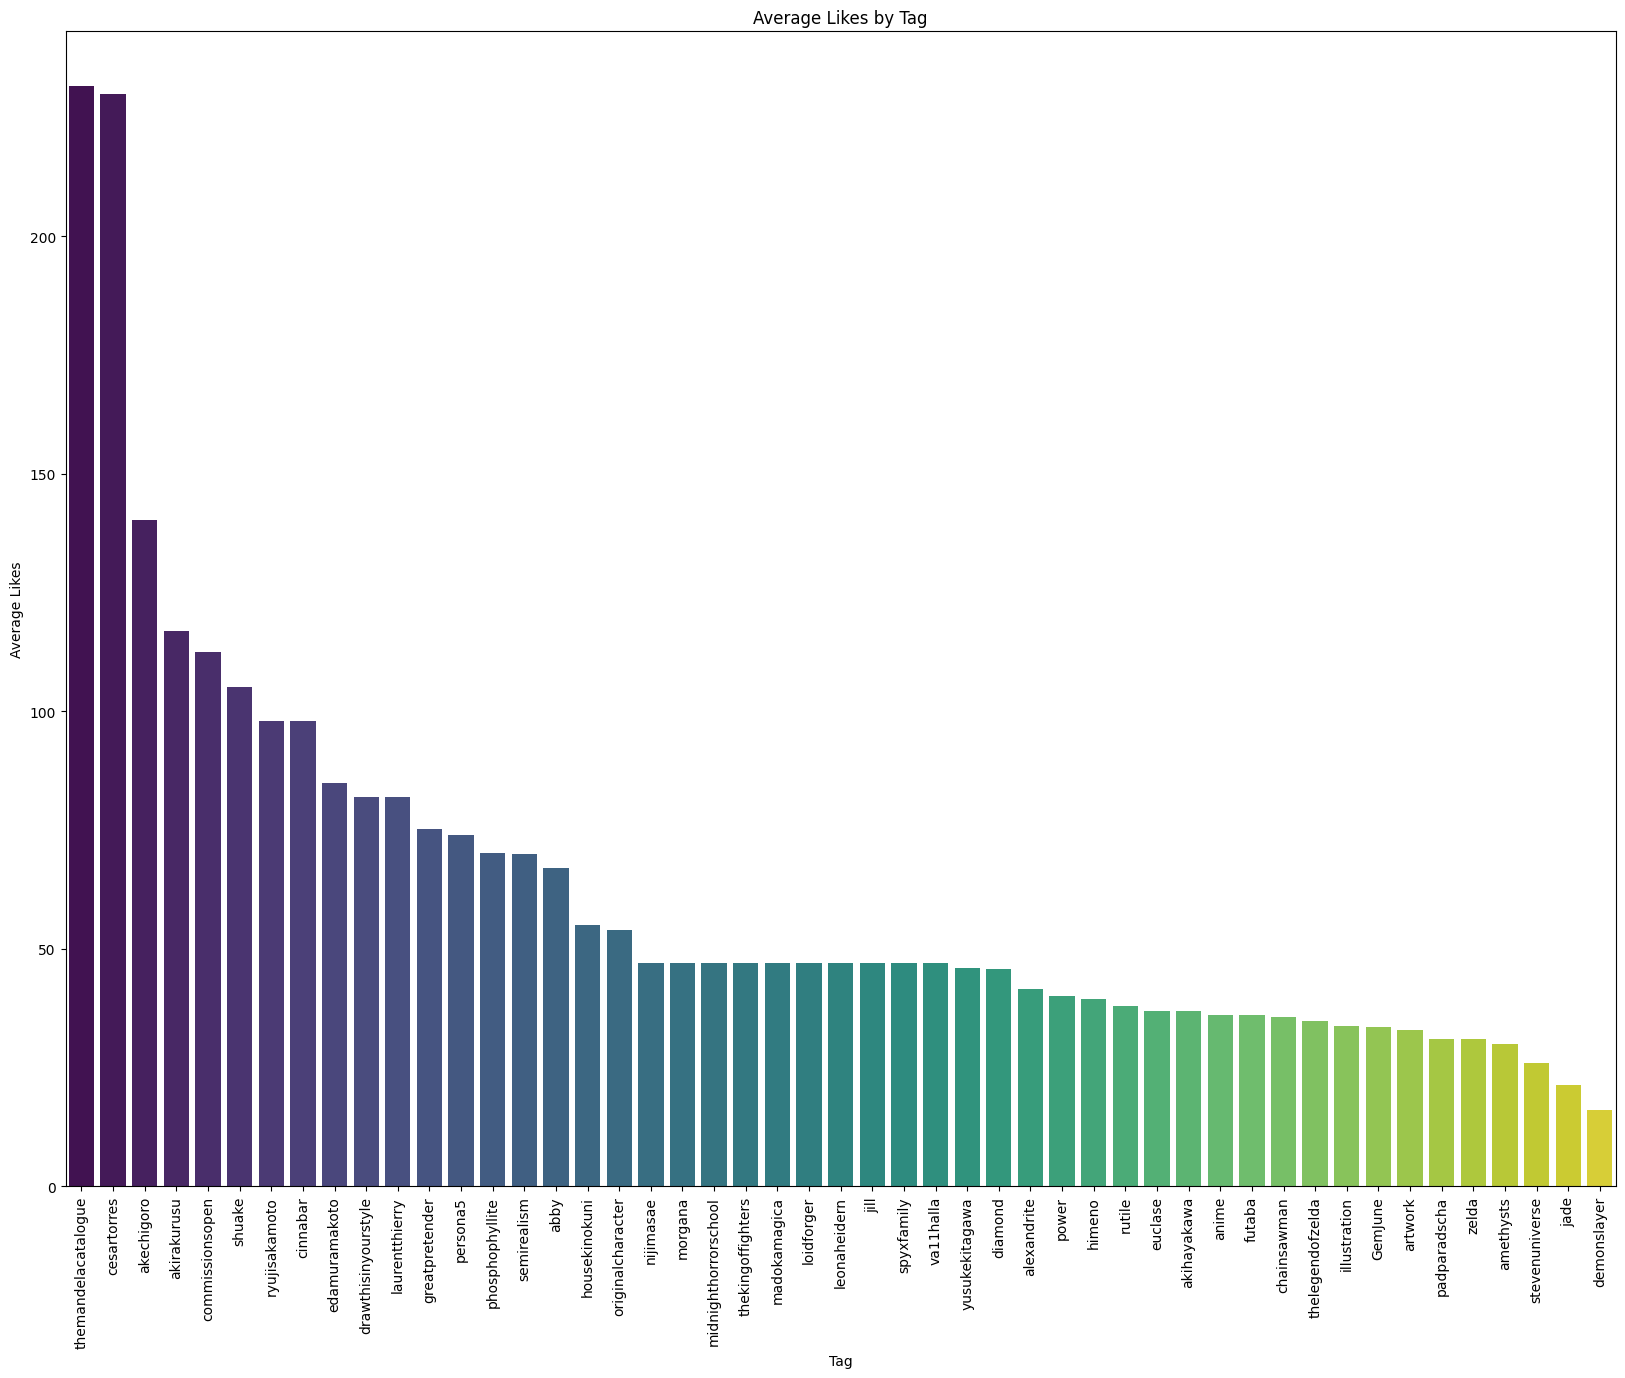

In [65]:
# Calculate average likes by group
avg_likes_by_group = df_tag_counts.groupby('Group')['Avg Likes'].mean().reset_index()

# Sort the DataFrame by 'Avg Likes' in descending order
avg_likes_by_group = avg_likes_by_group.sort_values(by='Avg Likes', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Group', y='Avg Likes', data=avg_likes_by_group, hue='Group', palette='viridis', dodge=False)
plt.title('Average Likes by Tag')
plt.xlabel('Tag')
plt.ylabel('Average Likes')
plt.xticks(rotation=90, fontsize=10)

plt.savefig("seaborn_plot.png")

plt.show()